In [1]:
import numpy as np
global np
import scipy as sp
import scipy.signal as signal
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact
import sys
import wave
sys.path.append("../backend/")
%matplotlib inline
def load_wav(filepath, t_start = 0, t_end = sys.maxint) :
    """Load a wave file, which must be 22050Hz and 16bit and must be either
    mono or stereo. 
    Inputs:
        filepath: audio file
        t_start, t_end:  (optional) subrange of file to load (in seconds)
    Returns:
        a numpy floating-point array with a range of [-1, 1]
    """
    wf = wave.open(filepath)
    num_channels, sampwidth, fs, end, comptype, compname = wf.getparams()
    
    # for now, we will only accept 16 bit files at 22k
    assert(sampwidth == 2)
    assert(fs == 22050)

    # start frame, end frame, and duration in frames
    f_start = int(t_start * fs)
    f_end = min(int(t_end * fs), end)
    frames = f_end - f_start

    wf.setpos(f_start)
    raw_bytes = wf.readframes(frames)
    # convert raw data to numpy array, assuming int16 arrangement
    samples = np.fromstring(raw_bytes, dtype = np.int16)

    # convert from integer type to floating point, and scale to [-1, 1]
    samples = samples.astype(np.float)
    samples *= (1 / 32768.0)

    if num_channels == 1:
        return samples

    elif num_channels == 2:
        return 0.5 * (samples[0::2] + samples[1::2])

    else:
        raise('Can only handle mono or stereo wave files') 

# Modulation
What is modulation?
The idea is simple, we have a signal of information that we wish to convey, but we need a way to optimally deliver it over a given medium. For example, with radios we have all of this audio frequency content, but having all of it transmit in the audible range would result in a garbabled mess. So we want to move the audio content into other frequency ranges.

For today this is the audio I will be using:

In [2]:
audioFileDir = str("./Audio/Sir Duke Stevie Wonder Sample.wav")
signal = load_wav(audioFileDir)
ipd.Audio(signal,rate=22050)

You can change it by changing the string variable to point towards your own audio on your own system.

# Amplitude Modulation

Suppose we have some audio that we want to transmit at a given carrier frequency. As we have mentioned before we can use the heterodyning principle in order to get push that audio conctent to the desired carrier frequency.

(386608,)


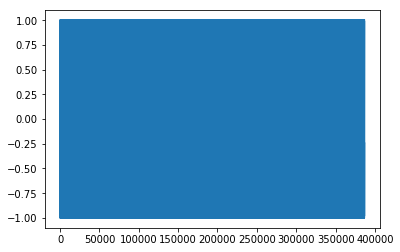

/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


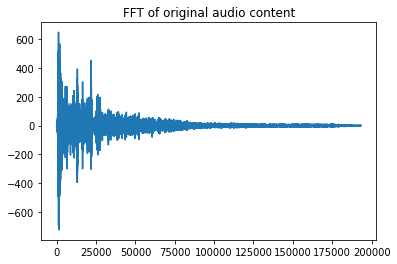

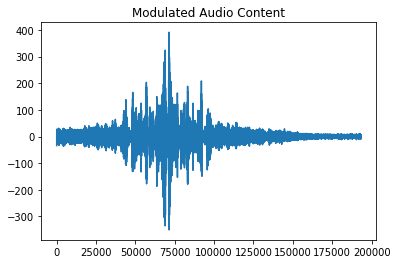

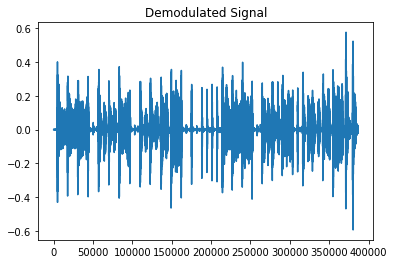

In [3]:
def amplitudemodulationDemo(wc=1):
    audiofft = np.fft.rfft(signal)
    print signal.shape
    t = np.linspace(0,signal.shape[0],signal.shape[0])
    cosine = np.cos(2*np.pi*wc*t)
    modulated = np.multiply(signal,cosine)
    ipd.Audio(modulated,rate=22050) #play the audio frequency content of this modulated signal. 
    fftmod = np.fft.rfft(modulated)
    plt.figure()
    plt.plot(cosine)
    plt.show()
    plt.figure()
    plt.plot(audiofft[:500000])
    plt.title("FFT of original audio content")
    plt.show()
    plt.figure()
    plt.plot(fftmod[:500000])
    plt.title("Modulated Audio Content")
    plt.show()
    #Demodulate the signal
    demod = np.multiply(modulated,cosine)
    plt.figure()
    plt.plot(demod)
    plt.title("Demodulated Signal")
    plt.show()
    return demod
    
demodulatedaudio = amplitudemodulationDemo(wc=int(4000*len(signal)/22050.))

In [4]:
ipd.Audio(demodulatedaudio,rate=22050)

To demodulate this signal we can multiply by a cosine in the same way that we did to modulate the audio content.

# Frequency Modulation

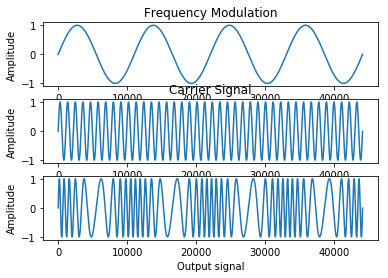

In [5]:
def frequencymodulationDemo():
    modulator_frequency = 4.0
    carrier_frequency = 40.0
    modulation_index = 1.0

    time = np.arange(44100.0) / 44100.0
    modulator = np.sin(2.0 * np.pi * modulator_frequency * time) * modulation_index
    carrier = np.sin(2.0 * np.pi * carrier_frequency * time)
    product = np.zeros_like(modulator)

    for i, t in enumerate(time):
        product[i] = np.sin(2. * np.pi * (carrier_frequency * t + modulator[i]))

    plt.subplot(3, 1, 1)
    plt.title('Frequency Modulation')
    plt.plot(modulator)
    plt.ylabel('Amplitude')
    plt.xlabel('Modulator signal')
    plt.subplot(3, 1, 2)
    plt.plot(carrier)
    plt.title("Carrier Signal")
    plt.ylabel('Amplitude')
    #plt.xlabel('Carrier signal')
    plt.subplot(3, 1, 3)
    plt.plot(product)
    plt.ylabel('Amplitude')
    plt.xlabel('Output signal')
    plt.show()
    
frequencymodulationDemo()

Some people have questions about why FM radio is so much more prevelent than AM radio.
One reason is that AM radio frequencies (~1MHz) have a weird atmospheric property that they are incredibly dependent upon the amount of EM waves hitting the atmosphere from the sun. So much so that during nighttime the AM radio waves from one station are able to broadcast all the way around the world. This is bad because one station in new zealand that plays death metal at 1MHz might interfer with with another station playing classical music at 1MHz from Boston. Thus, the way that this is resolved is that internationally and nationally there are agreements about which AM stations are allowed to play radio at what time. The FCC has an official publication on the matter:
https://www.fcc.gov/media/radio/am-stations-at-night. According to the FCC they no longer allow daytime-only radio stations as of December 1st, 1987, meaning that come nighttime new radio stations simply decerase their power to only service the local area.

From a technical point of fiew, frequency modulation has the following improvements over amplitude modulation.

When FM was first created at Columbia around 1920 the creator, Howard Armstrong, was seeking to create a modulation scheme with a better signal to noise ratio than AM. His idea was to use higher frequencies, which many radio engineers at the time would have found confusing as they believed high frequencies were a huge noise source. However, the tradeoff in thise design choice is that the bandwidth sizes increase because of the modulation scheme. Rather than just needing 48khz like with AM radio modern FM radio needs 180khz in order to transmit 15khz of audio.

# Phase Modulation

Phase modulation is very well demonstrated by an image:

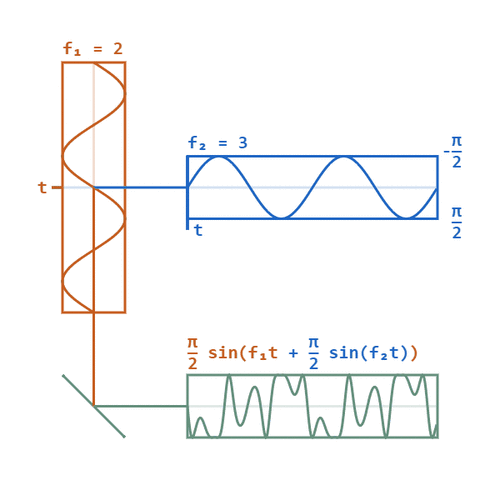

The rest of these modulation methods are primily based on trying to transmit data/ messages. I will be choosing the below message. You can change it if you wish.

In [6]:
message = "C'est n'est pas une pipe" #It really isn't

# Amplitude Shift Keying

Amplitude Shift Keying

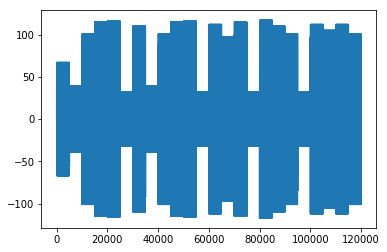

In [12]:
def amplitudeshiftkeyingDemo(message,f=1):
    time = np.arange(len(message)*5000.)/(len(message)*5000.)
    carrier = np.sin(2*np.pi*f*time)
    for i,value in enumerate(message):
        carrier[5000*i:5000*(i+1)] = ord(value)*carrier[5000*i:5000*(i+1)]
    plt.figure()
    plt.plot(carrier)
    plt.show()
    return carrier
    
returnedsignal = amplitudeshiftkeyingDemo(message,f=1000.)
ipd.Audio(returnedsignal,rate=20000)

In [13]:
def amplitudeshiftkeyingdemodDemo(carrier,f):
    maxvalues = []
    for i in range(int(len(returnedsignal)/5000)):
        maxvalues.append(max(returnedsignal[5000*i:5000*(i+1)]))
    returnmessage = ''
    for i in maxvalues:
        returnmessage += str(chr(int(i)))
    print returnmessage
amplitudeshiftkeyingdemodDemo(returnedsignal,f=1000.)

C'est n'est pas une pipe


So, we see that amplitude shift keying works well, and seems reasonably intuitive. Let's talk about some of the details of implementing this type of modulation.

# Frequency Shift Keying

Frequency Shift Keying is

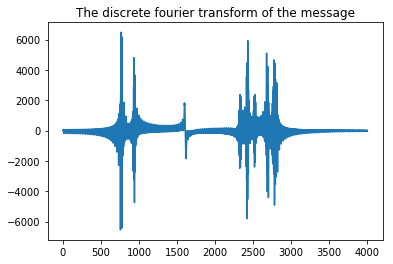

In [14]:
def frequencyshiftkeyingDemo(message):
    time = np.arange(5000.)/(5000.)
    returnable = np.zeros(5000*len(message))
    for index,value in enumerate(message):
        returnable[index*5000:(index+1)*5000] = np.sin(2*np.pi*ord(value)*time)
    plt.figure()
    plt.plot(np.fft.rfft(returnable)[0:4000])
    plt.title("The discrete fourier transform of the message")
    plt.show()
    return returnable
modulatedmessage = frequencyshiftkeyingDemo(message)

# Quadrature Amplitude Modulation

Quadrature Amplitude Modulation (QAM) is a method of encoding binary inforamtion within a signals sines and cosines. Since signals can be decomposed into even (cosine) and odd (sine) parts that means that we can encode binary inforation as sines and cosines, or another way to think about that is real and imaginary parts.

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  


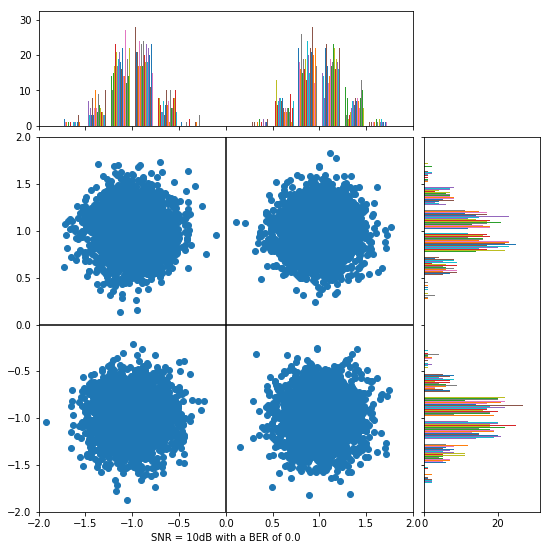

In [15]:
import logging
logging.basicConfig(stream=sys.stderr, level=logging.DEBUG)
from matplotlib.ticker import NullFormatter
N=100
x=2*np.random.random_integers(0,1,(N,N))-1 #real part of symbol matrix 's'
y=2*np.random.random_integers(0,1,(N,N))-1 #imaginary part of symbol matrix 's'

s=x+1j*y #complex matrix (x+y) of QPSK symbols
t,w=(np.empty((N,N), dtype=complex) for i in range(2)) #generate two empty, NxN arrays for use later


#logging.debug('s=%s',s)

# definitions for the plot axes
left, width=0.1,0.65
bottom, height=0.1,0.65
bottom_h=left_h=left+width+0.02

rect_scatter=[left,bottom,width,height]
rect_histx=[left,bottom_h,width,0.2]
rect_histy=[left_h,bottom,0.2,height]

# start with a rectangular figure
plt.figure(1, figsize=(8,8))

# set up plots
axScatter=plt.axes(rect_scatter)
axHistx=plt.axes(rect_histx)
axHisty=plt.axes(rect_histy)

# no axis labels for box plots
axHistx.xaxis.set_major_formatter(NullFormatter())
axHisty.yaxis.set_major_formatter(NullFormatter())

# Generate SNR scale factor for AWGN generation:
error_sum=0.0 # initialize counter to zero to be used in BER calculation

SNR_MIN=-10
SNR_MAX=10
SNR=SNR_MAX # desired SNR used to determine noise power

Eb_No_lin=10**(SNR/10.0) # convert SNR to decimal

#logging.debug('Eb_No_lin=%s',Eb_No_lin)

No=1.0/Eb_No_lin # Linear power of the noise; average signal power = 1 (0dB)
scale=np.sqrt(No/2) # variable to scale random noise values in AWGN loop

#logging.debug('No=%s',No)
#logging.debug('scale=%s',scale)

# loop through each frame, modulate, add gaussian noise (AWGN) then decode back in symbols
for i in range(N):
	n=np.fft.ifftn(np.random.normal(scale=scale, size=N)+1j*np.random.normal(scale=scale, size=N)) # array of noise
	#n=0 # uncomment here and comment above if you want to remove all noise
	#logging.debug('n[%s]=\n%s',i,n)
	t[i]=np.fft.ifftn(s[i])	
	w[i]=np.fft.fftn(t[i]+n) # add noise here
	
	# decode received signal + noise back into bins/symbols
	z=np.sign(np.real(w[i]))+1j*np.sign(np.imag(w[i]))
	#logging.debug('z of loop %s=\n%s',i,z)
	#logging.debug('z!=s[%s]=\n%s',i,z!=s[i])

	# find errors
	err=np.where(z != s[i])
	#logging.debug('err[%s]=\n%s',i,err)
	
	# add up errors per frame
	error_sum+=float(len(err[0]))
	#logging.debug('error_sum[%s]=\n%s',i,error_sum)

# show total error for entire NxN message
BER=error_sum/N**2
#logging.debug('Final error_sum = %s out of a total possible %s symbols',error_sum,N**2)
#logging.debug('Total BER=%s',BER)

# scatter plot:
axScatter.scatter(np.real(w),np.imag(w))

# draw axes at origin
axScatter.axhline(0, color='black')
axScatter.axvline(0, color='black')

# add title (at x-axis) to scatter plot
#title = 'Zero noise'
title = 'SNR = %sdB with a BER of %s' % (SNR,BER)
axScatter.xaxis.set_label_text(title)

# now determine nice limits by hand:nu
binwidth = 0.25 # width of histrogram 'bins'
xymax = np.max( [np.max(np.fabs(np.real(w))), np.max(np.fabs(np.imag(w)))] ) # find abs max symbol value; nominally 1 
lim = ( int(xymax/binwidth) + 1) * binwidth # create limit that is one 'binwidth' greater than 'xymax'

axScatter.set_xlim( (-lim, lim) ) # set the data limits for the xaxis -- autoscale
axScatter.set_ylim( (-lim, lim) ) # set the data limits for the yaxis -- autoscale

bins = np.arange(-lim, lim + binwidth, binwidth) # create bins 'binwidth' apart between -lin and +lim -- autoscale
axHistx.hist(np.real(w), bins=bins) # plot a histogram - xaxis are real values
axHisty.hist(np.imag(w), bins=bins, orientation='horizontal') # plot a histogram - yaxis are imaginary values

axHistx.set_xlim( axScatter.get_xlim() ) # set histogram axes to match scatter plot axes limits
axHisty.set_ylim( axScatter.get_ylim() ) # set histogram axes to match scatter plot axes limits

plt.show()

Charles will now talk for a bit about sphere packing and how it relates to the idea of QAM.